# Titanic Project

# Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import norm 
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('TITANIC.CSV')

First 5 entries

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Last 5 Entries

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

The dataset contains 891 rows and 12 columns

Datatype of the features

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Statistical Summary

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing Values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

HEATMAP OF NULL VALUES

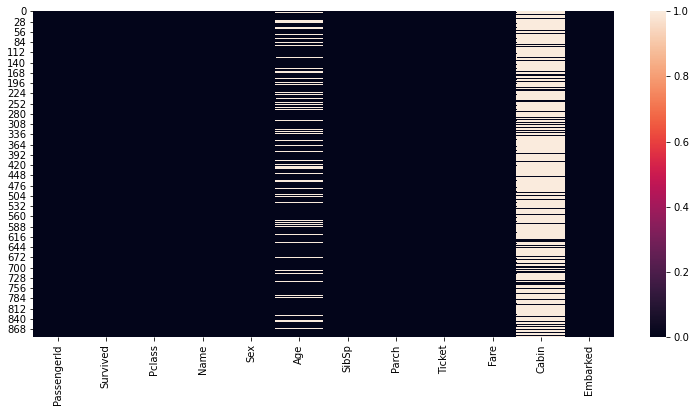

In [29]:
plt.figure(figsize=(13,6))
sns.heatmap(df.isnull())
plt.show()

HEATMAP ABOVE SHOWS NULL VALUES IN AGE AND CABIN FEATURES.

In [10]:
def bar_plot(variable):
    
    # get feature
    var = df[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    
    print("{}:\n{}".format(variable,varValue))

BARPLOTS BELOW SHOW FREQUENCY OF EACH FEATURE.

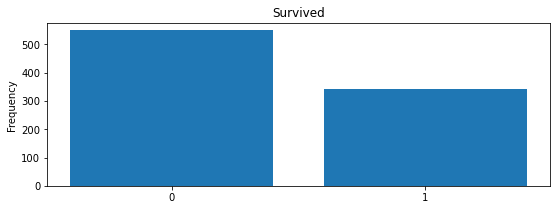

Survived:
0    549
1    342
Name: Survived, dtype: int64


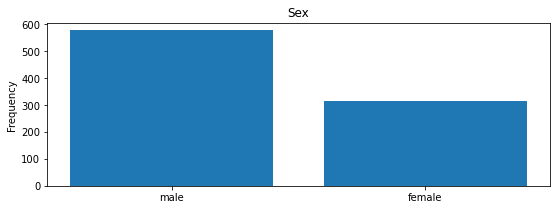

Sex:
male      577
female    314
Name: Sex, dtype: int64


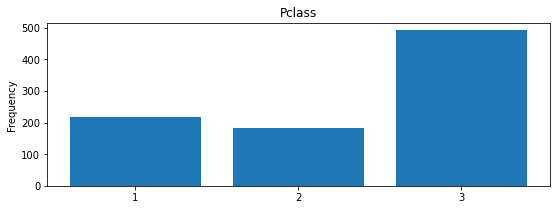

Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


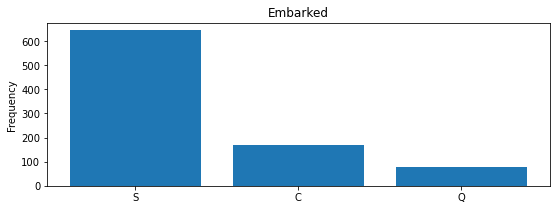

Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


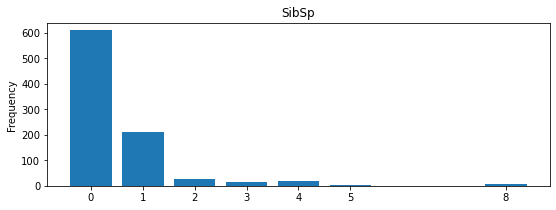

SibSp:
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


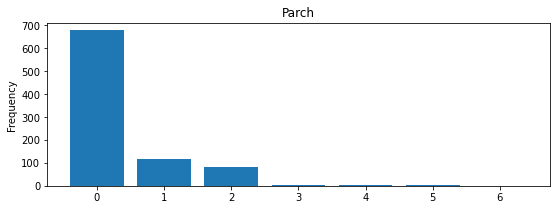

Parch:
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [31]:
category = ["Survived","Sex","Pclass","Embarked","SibSp","Parch"]

for i in category:
    bar_plot(i)

<AxesSubplot:xlabel='Sex', ylabel='count'>

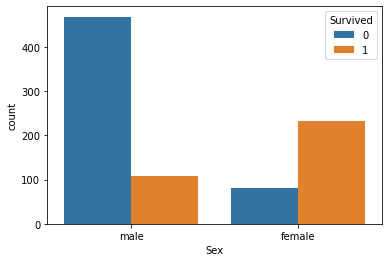

In [14]:
sns.countplot("Sex", hue = "Survived", data = df)

Countplot of Sex shows that male died more than the female also the survival rate of male is less than female.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

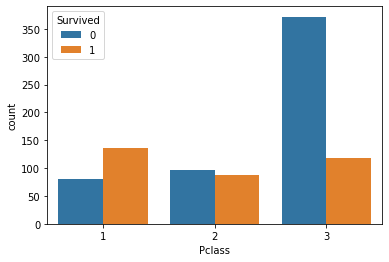

In [16]:
sns.countplot("Pclass", hue = "Survived", data =df)

Passengers of class 3 have death rate more than the other two classes. The survival rate and death rate of first and second 
class are nearly same.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

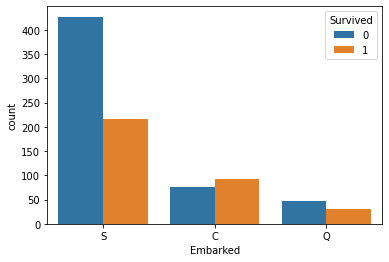

In [17]:
sns.countplot("Embarked", hue = "Survived", data = df)

Embarked point S shows highest death rate and lowest is for Q point.

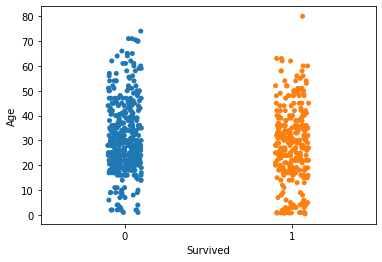

In [26]:
  sns.stripplot(x=df["Survived"],y=df["Age"]);

Death rate is more for the people of age of 20-35 years.The survival and death rate are nearly equally spread. 

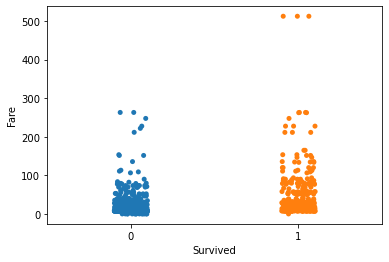

In [27]:
sns.stripplot(x=df["Survived"],y=df["Fare"]);

Survival with respect to fare was equal except for few people who paid high fare survived.

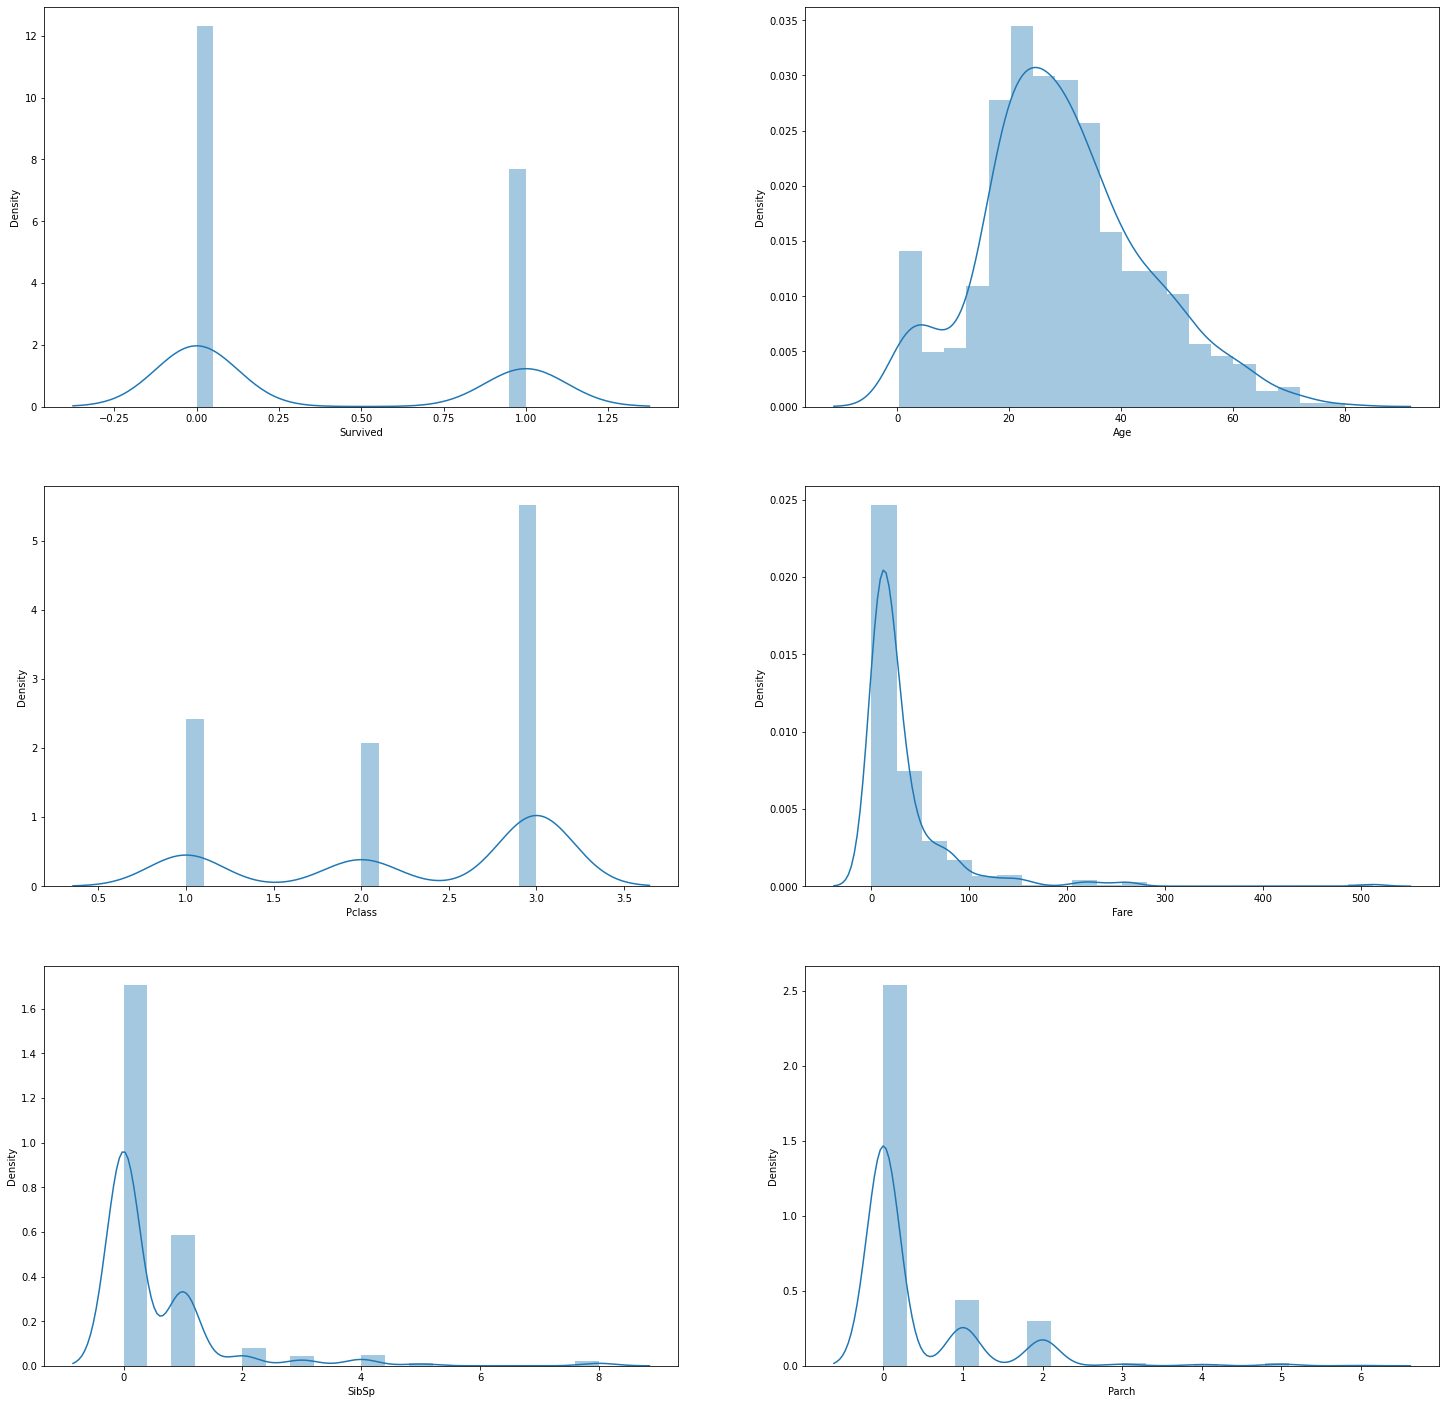

In [41]:
collist=["Survived","Age","Pclass","Fare","SibSp","Parch"]
ncol=2
nrows=3
plt.figure(figsize=(25,25))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],bins=20)


The above plots shows the distribution of features. Fare, SibSp and parch shows high positive skewness.

# Checking Correlation

In [44]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


HEATMAP OF CORRELATION

<AxesSubplot:>

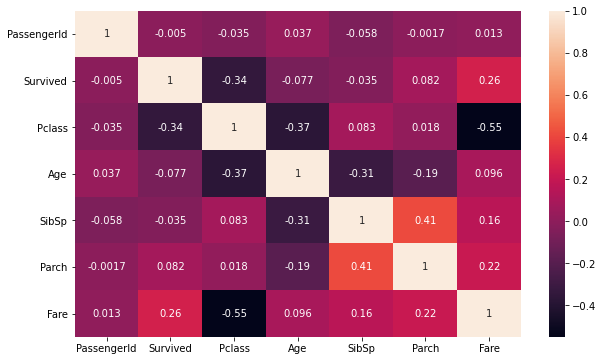

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

CORRELATION WITH RESPECT TO TARGET

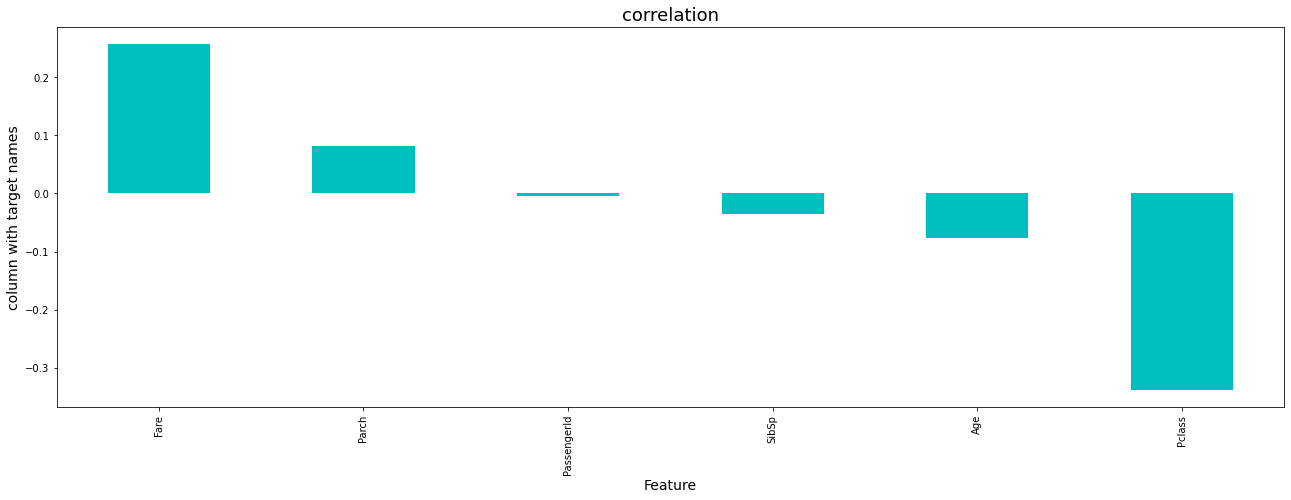

In [46]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color="c")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

FARE, PARCH AND PASSENGERS SHOW POSITIVE CORREALTION. FARE HAS HIGHEST POSITIVE CORRELATION WHEREAS PCLASS HAS HIGHEST 
NEGATIVE CORRELATION WITH THE TARGET VARIABLE.

# Box Plots showing outliers

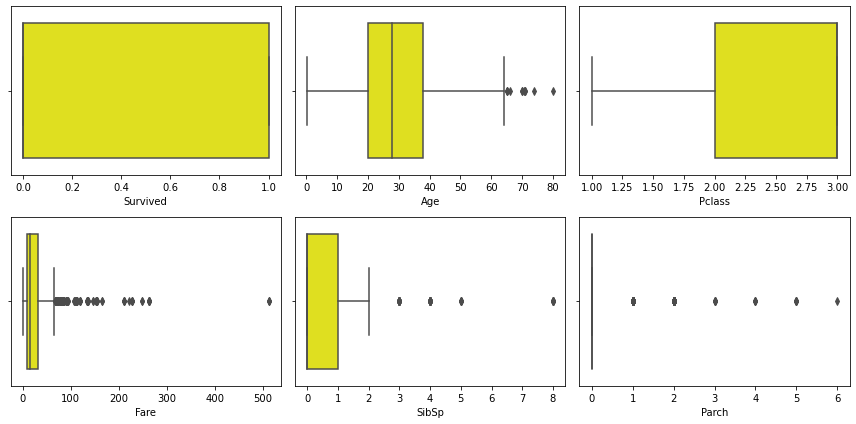

In [51]:
coll=["Survived","Age","Pclass","Fare","SibSp","Parch"]
ncol=3
nrows=2
plt.figure(figsize=(12,2*ncol))
for i in range(0, len(coll)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[coll[i]],color='yellow',orient='v')
    plt.tight_layout()

EXCEPT SURVIVED AND PCLASS OTHER FEATURES SHOWS OUTLIERS.

# MULTIVARIATE ANALYSIS

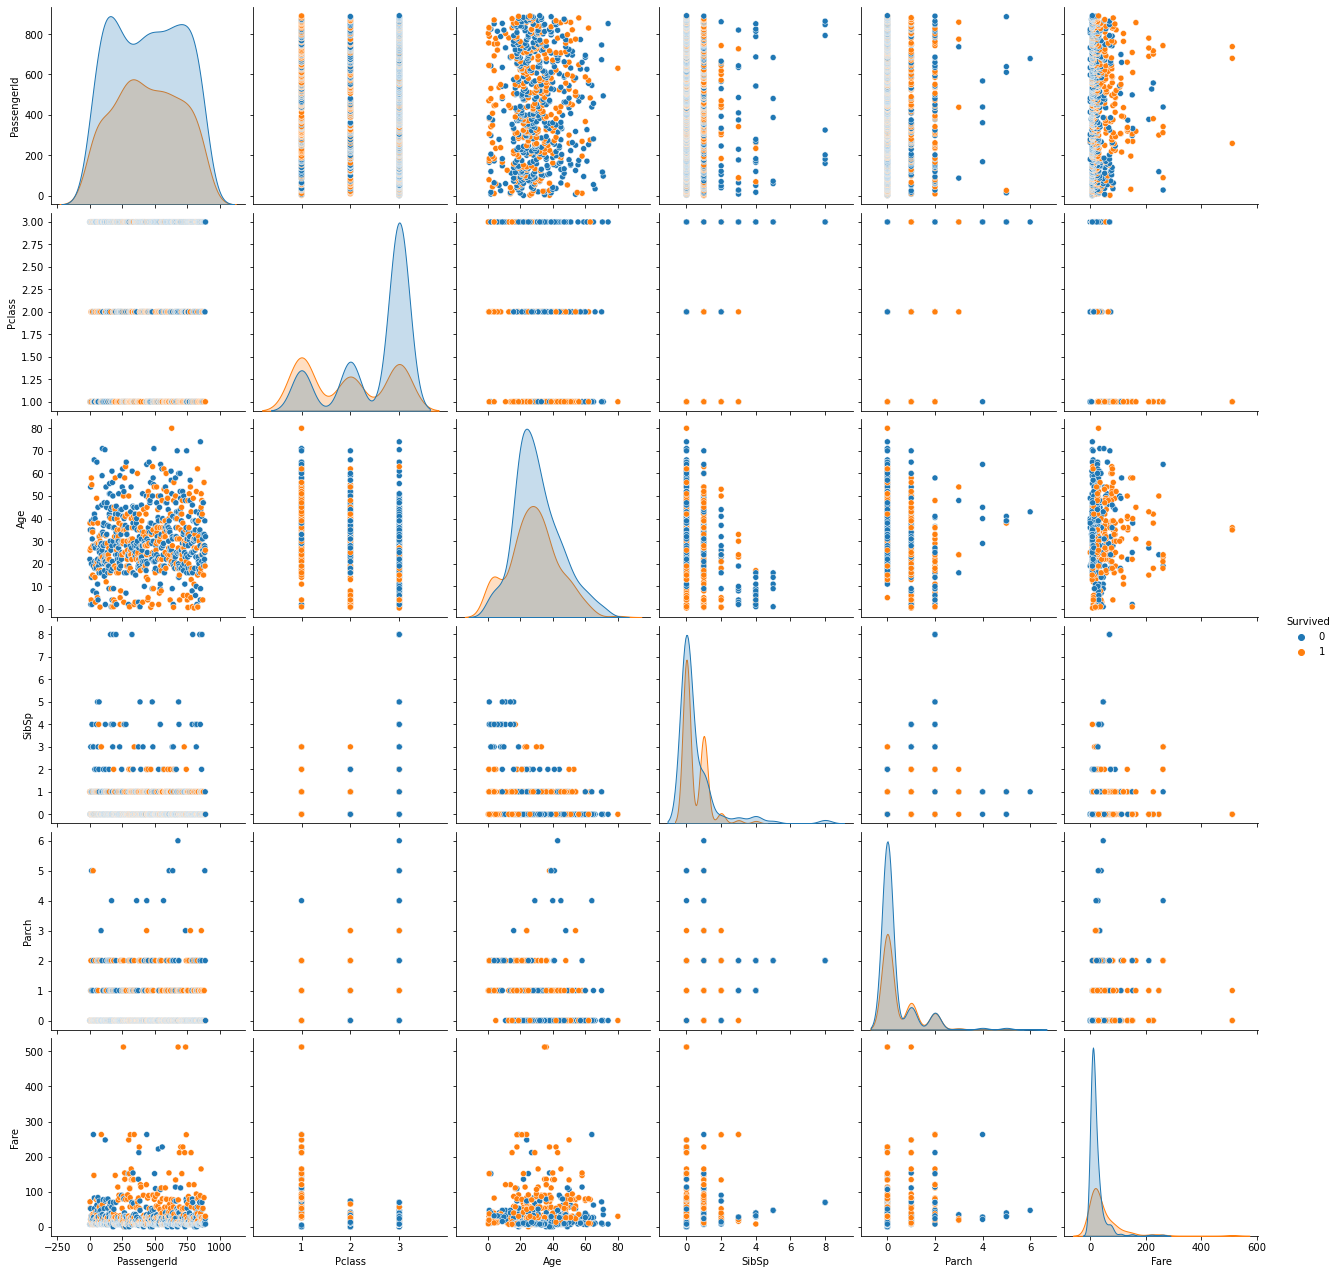

In [50]:
sns.pairplot(df,hue="Survived",size=3)

# TREATING NULL VALUES

In [52]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [53]:
df["Age"] = df[["Age", "Pclass"]].apply(impute_age, axis = 1)

In [58]:
df['Embarked'].fillna('S', inplace=True)

In [59]:
df.drop('Cabin', axis=1, inplace=True)

In [60]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

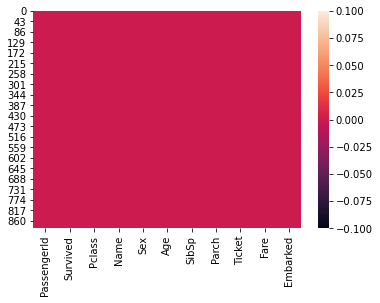

In [61]:
sns.heatmap(df.isnull())

HEATMAP SHOWS NO NULL VALUES.

In [62]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# ENCODING

In [63]:
df_gender = pd.get_dummies(df['Sex'], drop_first=True)
df_new = pd.concat([df, df_gender], axis=1)

In [64]:
df_new.drop(['Sex'], axis=1, inplace=True)
df_new.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0


In [65]:
df_embarked = pd.get_dummies(df['Embarked'], drop_first=True)
data = pd.concat([df_new, df_embarked], axis=1)

In [66]:
data.drop(['Embarked'], axis=1, inplace=True)
data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


# CHECKING SKEWNESS

In [67]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.548256
SibSp       3.695352
Parch       2.749117
Fare        4.787317
male       -0.618921
Q           2.948778
S          -1.009665
dtype: float64

# Separating x(Independent) and y(target) variable

In [68]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [69]:
x.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0


In [70]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

# Treating Skewness

In [71]:
x.skew()

Pclass   -0.630548
Age       0.548256
SibSp     3.695352
Parch     2.749117
Fare      4.787317
male     -0.618921
Q         2.948778
S        -1.009665
dtype: float64

In [72]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [73]:
x.skew()

Pclass   -0.444064
Age      -0.880851
SibSp     1.661245
Parch     1.675439
Fare      0.394928
male     -0.618921
Q         2.949219
S        -1.009665
dtype: float64

# Scaling

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [75]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.505954,0.315465,0.0,0.338125,1.0,0.0,1.0
1,0.0,0.693067,0.315465,0.0,0.685892,0.0,0.0,0.0
2,1.0,0.559696,0.000000,0.0,0.350727,0.0,0.0,1.0
3,0.0,0.662836,0.315465,0.0,0.639463,0.0,0.0,1.0
4,1.0,0.662836,0.000000,0.0,0.352955,1.0,0.0,1.0


# Finding the best random state

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8582089552238806 on Random State:  129


# Train Test Split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=129)

# Finding best model

# Logistic Regression

In [79]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred=lg.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8582089552238806
[[138  13]
 [ 25  92]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       151
           1       0.88      0.79      0.83       117

    accuracy                           0.86       268
   macro avg       0.86      0.85      0.85       268
weighted avg       0.86      0.86      0.86       268



# KNeighborsClassifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score:
0.8283582089552238
[[137  14]
 [ 32  85]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       151
           1       0.86      0.73      0.79       117

    accuracy                           0.83       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



# Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

accuracy_score:
0.7835820895522388
[[128  23]
 [ 35  82]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.78      0.70      0.74       117

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8246268656716418
[[137  14]
 [ 33  84]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       151
           1       0.86      0.72      0.78       117

    accuracy                           0.82       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.83      0.82      0.82       268



# AdaBoostClassifier

In [83]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred=ad.predict(x_test)
print("accuracy_score:",)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy_score:
0.8507462686567164
[[135  16]
 [ 24  93]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       151
           1       0.85      0.79      0.82       117

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.85      0.85      0.85       268



# Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

[0.7877095  0.82022472 0.79775281 0.7752809  0.83146067]
0.8024857196660597


In [85]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn,x,y,cv=5)
print(score)
print(score.mean())

[0.7877095  0.78651685 0.83146067 0.81460674 0.82022472]
0.8081036971941498


In [86]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())

[0.72067039 0.78651685 0.80898876 0.73595506 0.80898876]
0.77222396585274


In [87]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
scorerf=score.mean()

[0.79329609 0.79775281 0.83707865 0.75842697 0.83146067]
0.803603038101814


In [88]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

[0.75977654 0.80898876 0.82022472 0.8258427  0.8258427 ]
0.8081350825434687


The difference between cross validation and accuracy score is for random forest regressor . Therefore it is our best model.

# Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV
parameter={'max_depth':np.arange(2,10),'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [90]:
Final_mod=DecisionTreeClassifier(criterion='gini',max_depth=9)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

78.35820895522389


# AUC-ROC CURVE

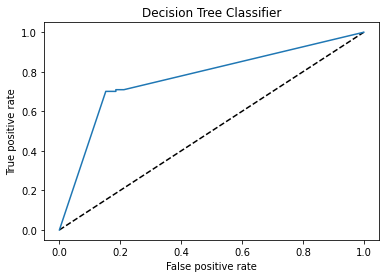

0.7742684100299994

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

# Saving The Model

In [92]:
import joblib
joblib.dump(dtc,'dtcfile.obj')

['dtcfile.obj']

# Prediction

In [93]:
dtc_from_joblib=joblib.load('dtcfile.obj')

In [94]:
dtc_from_joblib.predict(x_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1], dtype=int64)